In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("el_oro_crops_2021.csv", delimiter='\t').rename(columns={"Measure Names": "Measures", "Producto": "Product"})

In [12]:
df

,Measures,Product,No.,Fuente Tbl,Measure Values
0,Rendimiento (t/ha),Banano,1,ESPAC,3.648635e+01
1,Producción (t),Banano,1,ESPAC,1.502098e+06
2,Sup Cosechadas (ha),Banano,1,ESPAC,4.116878e+04
3,Sup Plantadas (ha),Banano,1,ESPAC,4.220240e+04
4,Rendimiento (t/ha),Cacao,2,ESPAC,4.680510e-01
...,...,...,...,...,...
91,Sup Plantadas (ha),Maíz suave choclo,23,ESPAC,1.070587e+01
92,Rendimiento (t/ha),Arveja tierna,24,ESPAC,4.545455e+00
93,Producción (t),Arveja tierna,24,ESPAC,2.392595e+00
94,Sup Cosechadas (ha),Arveja tierna,24,ESPAC,5.263708e-01


In [7]:
df['Measure Names'].unique()

array(['Rendimiento (t/ha)', 'Producción (t)', 'Sup Cosechadas (ha)',
       'Sup Plantadas (ha)'], dtype=object)

In [8]:
df.Producto.unique()

array(['Banano', 'Cacao', 'Maíz duro seco', 'Arroz',
       'Caña de azúcar para otros usos', 'Plátano', 'Café',
       'Limón (Fruta fresca)', 'Maíz suave seco', 'Naranja',
       'Fréjol seco', 'Maracuyá', 'Papa', 'Orito (Fruta fresca)',
       'Maíz duro choclo', 'Fréjol tierno', 'Haba seca', 'Yuca', 'Trigo',
       'Maní (Grano descascarado )', 'Mango', 'Tomate riñon',
       'Maíz suave choclo', 'Arveja tierna'], dtype=object)

In [13]:
mapping = {
    'Rendimiento (t/ha)': 'Yield (t/ha)', 
    'Producción (t)': 'Production (t)', 
    'Sup Cosechadas (ha)': 'Harvested Area (ha)', 
    'Sup Plantadas (ha)': 'Planted Area (ha)'
}

df['Measures'] = df['Measures'].map(mapping)

In [20]:
df.Measures.unique()

array(['Yield (t/ha)', 'Production (t)', 'Harvested Area (ha)',
       'Planted Area (ha)'], dtype=object)

In [15]:
product_mapping = {
    'Banano': 'Banana', 
    'Cacao': 'Cacao', 
    'Maíz duro seco': 'Dry hard corn', 
    'Arroz': 'Rice',
    'Caña de azúcar para otros usos': 'Sugar cane for other uses', 
    'Plátano': 'Plantain', 
    'Café': 'Coffee',
    'Limón (Fruta fresca)': 'Lemon (Fresh fruit)', 
    'Maíz suave seco': 'Dry soft corn', 
    'Naranja': 'Orange',
    'Fréjol seco': 'Dry bean', 
    'Maracuyá': 'Passion fruit', 
    'Papa': 'Potato', 
    'Orito (Fruta fresca)': 'Orito (Small Banana)',
    'Maíz duro choclo': 'Hard corn cob', 
    'Fréjol tierno': 'Tender bean', 
    'Haba seca': 'Dry broad bean', 
    'Yuca': 'Cassava', 
    'Trigo': 'Wheat',
    'Maní (Grano descascarado )': 'Peanut (Shelled grain)', 
    'Mango': 'Mango', 
    'Tomate riñon': 'Kidney tomato',
    'Maíz suave choclo': 'Soft corn cob', 
    'Arveja tierna': 'Tender pea'
}
df['Product'] = df['Product'].map(product_mapping)


In [35]:
df

,Measures,Product,No.,Fuente Tbl,Measure Values
0,Yield (t/ha),Banana,1,ESPAC,3.648635e+01
1,Production (t),Banana,1,ESPAC,1.502098e+06
2,Harvested Area (ha),Banana,1,ESPAC,4.116878e+04
3,Planted Area (ha),Banana,1,ESPAC,4.220240e+04
4,Yield (t/ha),Cacao,2,ESPAC,4.680510e-01
...,...,...,...,...,...
91,Planted Area (ha),Soft corn cob,23,ESPAC,1.070587e+01
92,Yield (t/ha),Tender pea,24,ESPAC,4.545455e+00
93,Production (t),Tender pea,24,ESPAC,2.392595e+00
94,Harvested Area (ha),Tender pea,24,ESPAC,5.263708e-01


In [60]:
# Create a pivot table
pivot_df = df.drop(columns=['Fuente Tbl', 'No.']).pivot(index='Product', columns='Measures')#.drop(columns=

# This will give a multi-level column index, to make it a single level, we can join the levels with an underscore
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
pivot_df = pivot_df.rename(columns={
    "Measure Values_Harvested Area (ha)": "Harvested Area (ha)",
    "Measure Values_Planted Area (ha)": "Planted Area (ha)",
    "Measure Values_Production (t)": "Production (t)",
    "Measure Values_Yield (t/ha)": "Yield (t/ha)"})
# Reset the index
pivot_df = pivot_df.reset_index().sort_values("Planted Area (ha)", axis=0, ascending=True).reset_index().drop(columns="index")
# pivot_df

In [61]:
pivot_df

,Product,Harvested Area (ha),Planted Area (ha),Production (t),Yield (t/ha)
0,Tender pea,0.526371,0.526371,2.392595e+00,4.545455
1,Soft corn cob,10.705869,10.705869,1.792849e+01,1.674641
2,Kidney tomato,17.015649,17.015649,5.446030e+02,32.006012
3,Mango,25.814777,25.814777,1.005771e+02,3.896104
4,Peanut (Shelled grain),29.431205,29.431205,2.398111e+01,0.814819
5,Wheat,33.012012,33.012012,7.184791e+00,0.217642
6,Cassava,38.102863,38.102863,2.510509e+02,6.588766
7,Dry broad bean,46.726868,46.726868,8.431535e+00,0.180443
8,Tender bean,93.553737,93.553737,9.926773e+01,1.061077
9,Hard corn cob,105.437930,105.437930,3.346568e+02,3.173969


In [69]:
%config InlineBackend.figure_formats = ['svg']

<Axes: title={'center': 'Planted Area in El Oro, 2021'}, xlabel='Planted Area (ha)', ylabel='Product'>

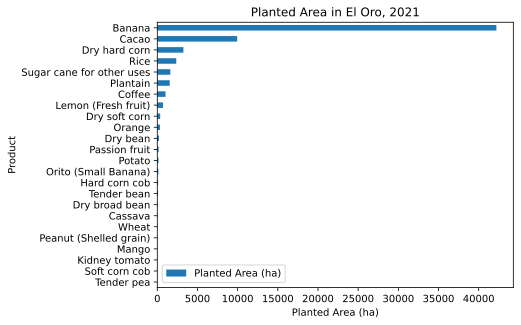

In [70]:
pivot_df.plot.barh(x="Product", y="Planted Area (ha)", logx=False, xlabel="Planted Area (ha)", title="Planted Area in El Oro, 2021")